In [1]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [2]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding="ISO-8859-1",names=["target", "ids", "date", "flag", "user", "text"])
#TEMPORARY EDIT TO CHANGE DATA SAMPLE SIZE
################################################################

df = df.dropna()
del df["flag"]
del df["user"]
del df["date"]
if (len(df["target"].unique()) == 1):
    del df["target"]
else:
    print(df["target"].unique())
df.head()

df = df.replace(4, 1)




#We have train and test, now we need to...
# Today's goal: Get a model, train it, test it
df.head()

[0 4]


,target,ids,text
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,is upset that he can't update his Facebook by ...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,my whole body feels itchy and like its on fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all...."


In [3]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)


In [4]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess


In [5]:
from nltk.stem import PorterStemmer
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english') and word[0] != '@']
    return clean_mess


In [6]:
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
tweet_list = 'I was playing with my friends with whom I used to play, when you called me yesterday'.split()
print(normalization(tweet_list))

['I', 'be', 'play', 'with', 'my', 'friends', 'with', 'whom', 'I', 'use', 'to', 'play,', 'when', 'you', 'call', 'me', 'yesterday']


In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer='word')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])


In [9]:
# Creates clean csv
cleandata = []
for sentence in df["text"].tolist():
    listofwords = no_user_alpha(sentence)
    cleandata.append(" ".join(listofwords))

df["new_data"] = cleandata
df.head()
    
    
df.to_csv('temporary.csv')      


KeyboardInterrupt: 

In [8]:
train_tweets = df.sample(frac = 0.8)
test_tweets = df.drop(train_tweets.index)


print(df['text'].size)




1600000


In [9]:
msg_train, msg_test, label_train, label_test = train_test_split(df['text'], df['target'], test_size=0.2)
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78    174641
           1       0.73      0.80      0.76    145359

    accuracy                           0.77    320000
   macro avg       0.77      0.78      0.77    320000
weighted avg       0.78      0.77      0.77    320000

[[130854  43787]
 [ 28791 116568]]
0.77319375


In [10]:
print("Training Size {}, Test Size {}".format(label_train.size,label_test.size))


Training Size 1280000, Test Size 320000


In [80]:
import tkinter as tk  
from tkinter import ttk
from PIL import ImageTk, Image  
import time


running = True
win = tk.Tk()# Application Name  
win.title("Python GUI App")# Label
win.geometry("500x500")
win.configure(bg="black")
  

lbl = ttk.Label(win, text = "Enter the name:").grid(column = 0, row = 0)# Click event 
def strike(text):
    result = ''
    for c in text:
        result = result + c + '\u0336'
    return result
def outputanalysis():
    text = [name.get()]
    print(pipeline.predict_proba(text))
    if running:
        print(name.get())
    win.after(1000,outputanalysis)
    if "Tom" in name.get():
        output = ttk.Label(win, font=("Arial", 25) ,text = "Very {} horrible {}".format(strike("bad"),pipeline.predict(["Fuck Sad"])[0])).grid(column = 1, row = 2)# Click event
    elif "MDST" in name.get():
        output = ttk.Label(win, font=("Arial", 25) ,text = "MDST {} is cool :D {}".format(strike("sucks"),pipeline.predict(["Happy Happy"])[0])).grid(column = 1, row = 2)# Click event
    elif(pipeline.predict([name.get()])[0] > 0.5):
        output = ttk.Label(win, font=("Arial", 25) ,text = "Message is Happy    {}".format(pipeline.predict([name.get()])[0])).grid(column = 1, row = 2)# Click event
        
    elif(pipeline.predict([name.get()])[0] < 0.5):
        output = ttk.Label(win, font=("Arial", 25) ,text = "Message is Sad      {}".format(pipeline.predict([name.get()])[0])).grid(column = 1, row = 2)# Click event
    


    

    #output = ttk.Label(win, text = "Output the number: {}".format(pipeline.predict([name.get()]))).grid(column = 1, row = 2)# Click event
    
    final = ttk.Label(win, text = pipeline.predict_proba(text)).grid(column = 1, row = 3)# Click event 
    if name.get() == "MDST":
        final = ttk.Label(win, text = pipeline.predict_proba(["happy"])).grid(column = 1, row = 3)# Click event 
def stop():
    global running
    running = False
def start():
    global running
    outputanalysis()
    running = True
def click():   
    print("Hi," + name.get())# Textbox widget  
name = tk.StringVar()  
nameEntered = ttk.Entry(win, width = 12, textvariable = name).grid(column = 0, row = 1)# Button widget  


happyimage = Image.open("happy.jpeg")
happyimage = happyimage.resize((90,90), Image.ANTIALIAS)

mdstlogo = Image.open("mdstlogo.png")
mdstlogo = mdstlogo.resize((350,350),Image.ANTIALIAS)
fulllogo = ImageTk.PhotoImage(mdstlogo)
mdstlogo = tk.Label(image=fulllogo)



test = ImageTk.PhotoImage(happyimage)
imagelabel = tk.Label(image=test)
imagelabel.image = test
button = ttk.Button(win, text = "submit", command = click).grid(column = 1, row = 1)




start = ttk.Button(win, text = "Start Analysis", command=start)
stop = ttk.Button(win, text = "Stop Analysis", command=stop)
final = ttk.Label(win, text = "Show Log Statistics").grid(column = 1, row = 2)
mdstlogo.place(x=100,y=90)
imagelabel.place(x=0,y=120)



#output = ttk.Label(win, text = "Output the number: {}".format(pipeline.predict([name.get()]))).grid(column = 1, row = 2)# Click event 




#start.grid()
#stop.grid()


outputanalysis()

win.mainloop()



text = ["Donald Trump amazing"]
print(text)
print(pipeline.predict(text))


[[0.50027734 0.49972266]]

[[0.50027734 0.49972266]]

[[0.50027734 0.49972266]]

[[0.5256377 0.4743623]]
tomato
[[0.5256377 0.4743623]]
tomato
[[0.5256377 0.4743623]]
tomato
[[0.5256377 0.4743623]]
tomato
[[0.51618612 0.48381388]]
fr
[[0.40129782 0.59870218]]
fruit
[[0.50027734 0.49972266]]

[[0.54340621 0.45659379]]
Frog
[[0.65383351 0.34616649]]
dog
[[0.65383351 0.34616649]]
dog
[[0.50027734 0.49972266]]
c
[[0.63563336 0.36436664]]
cat
[[0.63563336 0.36436664]]
cat
[[0.63563336 0.36436664]]
cat
[[0.63563336 0.36436664]]
cat
[[0.54534183 0.45465817]]
animal
[[0.54534183 0.45465817]]
animal
[[0.27580941 0.72419059]]
ha
[[0.2187313 0.7812687]]
happy
[[0.51380318 0.48619682]]
straw
[[0.31445625 0.68554375]]
strawberry
[[0.50027734 0.49972266]]

[[0.29510371 0.70489629]]
pineapple
[[0.29510371 0.70489629]]
pineapple
['Donald Trump amazing']
[1]


897250     i want: to go swimming and waterslides.  80 de...
1420706    @NeeliiE After midnight my brother will come h...
1281102    @lomomojo soon we'll be back on our feet (hope...
289581     @paulhardingham My tracking202 doesn't work. I...
969215     @mickeychat What about butter? I got to lick t...
                                 ...                        
706363                     But the poor fishies are thirsty 
749756     @trohman sends you a b12 shot and some orange ...
327638                                       workin history 
1030052    drinking MILO- to go and go HAHAHA  gotta love...
1393852    @yaseminx3 hai I'm Hatice, xan you follow me p...
Name: text, Length: 1280000, dtype: object


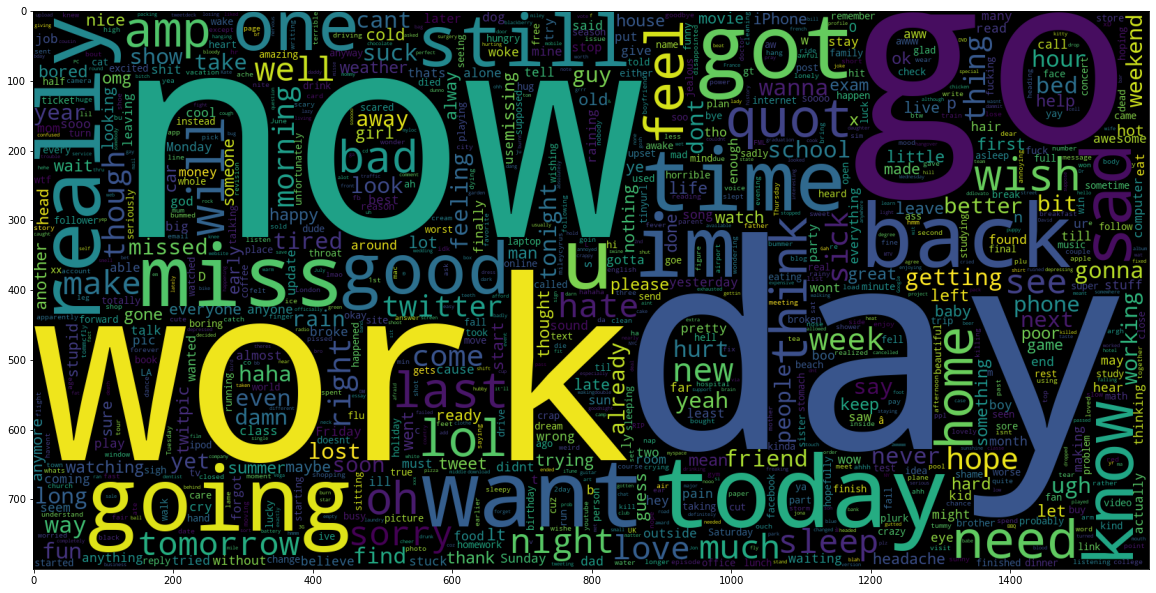

In [63]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
data_pos = df[df['target'] == 1]
data_neg = df[df['target'] == 0]
print(msg_train)
data_neg = data_neg
neg_text = data_neg['text']

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(["MDST","MDST","Michigan","MDST","MDST","MDST","Twitter","Tom","Me"]))
plt.imshow(wc)
tc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(neg_text))
plt.imshow(tc)




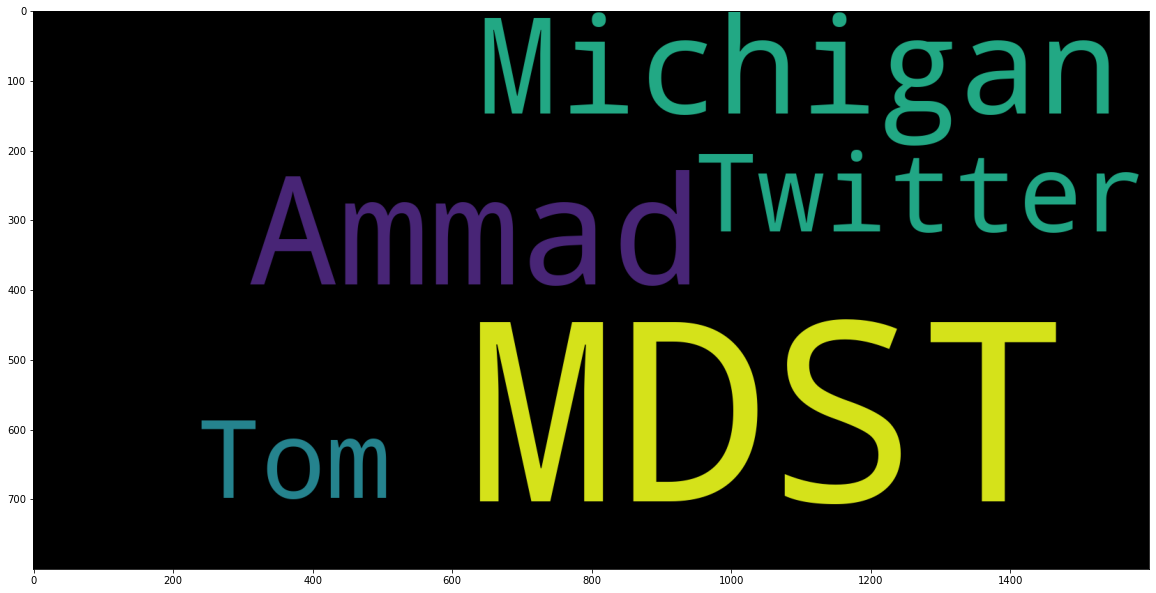

In [66]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(["Ammad","MDST","MDST","Michigan","MDST","MDST","MDST","Twitter","Tom","Me"]))
plt.imshow(wc)


In [56]:
data_neg['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [ ]:
import string
temp = list(string.ascii_uppercase)
print(pipeline.predict(["dope"]))
for i in temp:
    text = [i]
    print(text)
    print(pipeline.predict(text))
    

In [ ]:
def text_processing(tweet):
    
    #Generating the list of words in the tweet (hastags and other punctuations removed)
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    #Removing stopwords and words with unusual symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)
    
    #Normalizing the words in tweets 
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
    
    return normalization(no_punc_tweet)

In [ ]:
train_tweets = train_tweets.sample(frac = 0.1)
test_tweets = train_tweets.drop(train_tweets.index)

train_tweets.size

In [ ]:

train_tweets['parsed_text'] = train_tweets['text'].apply(text_processing)
test_tweets['parsed_text'] = test_tweets['text'].apply(text_processing)

        
    


In [ ]:
X = train_tweets['parsed_text']
y = train_tweets['target']
test = test_tweets['parsed_text']

In [ ]:
train_tweets.head()

In [ ]:
newlist = []
separator = ' '
for sentence in train_tweets["parsed_text"]:
    sent = separator.join(sentence)
    newlist.append(sent)
    

print(len(newlist))
train_tweets['filtered_sentence'] = newlist
print(train_tweets["parsed_text"].size)
train_tweets.head()


In [ ]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['filtered_sentence'], train_tweets['target'], test_size=0.2)

In [ ]:
#Machine Learning Pipeline
from sklearn.feature_extraction.text import CountVectorizer

#Machine Learning Pipeline
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer='word')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(msg_train,label_train)

In [ ]:
predictions = pipeline.predict(msg_test)

print(classification_report(predictions,label_test))
print ('\n')
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))